In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE

### learning curve

In [5]:
path_string = 'results/avg_acc.seqs'
with open(path_string,'rb') as f:
    avg_acc = pickle.load(f)
    
path_string = 'results/avg_auc.seqs'
with open(path_string,'rb') as f:
    avg_auc = pickle.load(f)
    
path_string = 'results/avg_loss.seqs'
with open(path_string,'rb') as f:
    avg_loss = pickle.load(f)
    
path_string = 'results/test_acc.seqs'
with open(path_string,'rb') as f:
    test_acc = pickle.load(f)
    
path_string = 'results/test_auc.seqs'
with open(path_string,'rb') as f:
    test_auc = pickle.load(f)


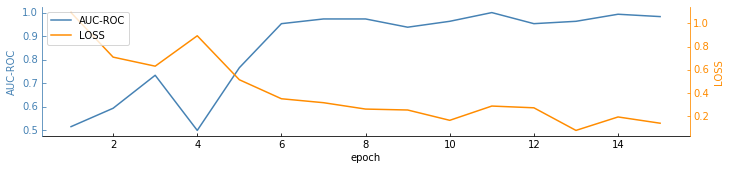

In [8]:
plt.figure(figsize=(10,2))
fig = plt.figure(1) 
ax_cof = HostAxes(fig, [0, 0, 0.9, 0.9])  

#parasite addtional axes, share x
ax_temp = ParasiteAxes(ax_cof, sharex=ax_cof)
#append axes
ax_cof.parasites.append(ax_temp)
#invisible right axis of ax_cof
ax_cof.axis['right'].set_visible(False)
ax_cof.axis['top'].set_visible(False)
ax_temp.axis['right'].set_visible(True)
ax_temp.axis['right'].major_ticklabels.set_visible(True)
ax_temp.axis['right'].label.set_visible(True)

#set label for axis
ax_cof.set_ylabel('AUC-ROC')
ax_cof.set_xlabel('epoch')
ax_temp.set_ylabel('LOSS')
fig.add_axes(ax_cof)

''' #set limit of x, y
ax_cof.set_xlim(0,2)
ax_cof.set_ylim(0,3)
'''
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
curve_cof = ax_cof.plot(x, avg_auc, label="AUC-ROC", color='steelblue')
curve_temp = ax_temp.plot(x, avg_loss, label="LOSS", color='darkorange')

#ax_temp.set_ylim(0,2)
ax_cof.legend()

ax_cof.axis['left'].label.set_color('steelblue')
ax_temp.axis['right'].label.set_color('darkorange')

ax_cof.axis['left'].major_ticks.set_color('steelblue')
ax_temp.axis['right'].major_ticks.set_color('darkorange')

ax_cof.axis['left'].major_ticklabels.set_color('steelblue')
ax_temp.axis['right'].major_ticklabels.set_color('darkorange')

ax_cof.axis['left'].line.set_color('steelblue')
ax_temp.axis['right'].line.set_color('darkorange')


plt.show()

### embedding PCA clustering

In [2]:
# states from all state in sequence of batch data 
# survival states from all state in sequence. the order is time 0 to onset
# dead states from all state in sequence. 

In [3]:
path_string = 'emb/states.seqs'
with open(path_string,'rb') as f:
    states = pickle.load(f)

In [4]:
path_string = 'emb/SurvivalStates.seqs'
with open(path_string,'rb') as f:
    survival = pickle.load(f)

In [5]:
path_string = 'emb/DeadStates.seqs'
with open(path_string,'rb') as f:
    dead = pickle.load(f)

In [112]:
#all 327; survival 264; dead 63
#label survival0 dead1
emb=[]
emb_label=[] # survival dead
emb_stage=[] # statge
for i in range (len(survival)):
    for j in range(len(survival[i])):
        emb.append(survival[i][j])
        emb_label.append(0)
        emb_stage.append(i)
for i in range (len(dead)):
    for j in range(len(dead[i])):
        emb.append(dead[i][j])
        emb_label.append(1)
        emb_stage.append(i+6)

#### PCA

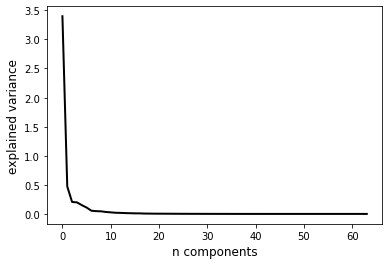

In [37]:
# components analysis
pca = PCA()
pca.fit(emb)
plt.figure()
plt.plot(pca.explained_variance_, 'k', linewidth=2)
plt.xlabel('n components', fontsize=12)
plt.ylabel('explained variance', fontsize=12)
plt.show()

In [100]:
pca = PCA(n_components = 2)
projected = pca.fit_transform(emb) 

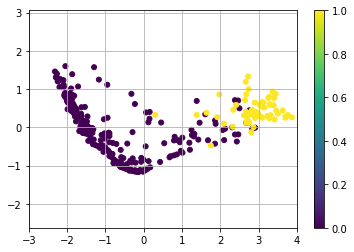

In [101]:
# dead (yellow) vs. sirvival (violet)
plt.scatter(projected[:,0],projected[:,1],c = emb_label,s=25)
plt.axis('equal')
plt.grid()
plt.colorbar()
ax = plt.gca().set_xlim(-3,4)
plt.savefig('scatter.jpg', dpi=300)

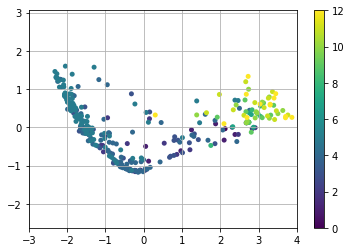

In [102]:
plt.scatter(projected[:,0],projected[:,1],c = emb_stage,edgecolor='none',alpha=1,s=25)
plt.axis('equal')
plt.grid()
plt.colorbar()
ax = plt.gca().set_xlim(-3,4)

In [103]:
survivalPro=np.array(projected.tolist()[:264])
deadPro=np.array(projected[264:])
survival_stage=emb_stage[:264]
dead_stage=emb_stage[264:]
for i in range(len(dead_stage)):
    dead_stage[i]=dead_stage[i]-6

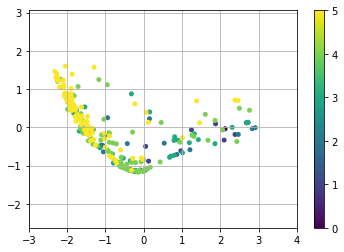

In [104]:
plt.scatter(survivalPro[:,0],survivalPro[:,1],c = survival_stage,edgecolor='none',alpha=1,s=25)
plt.axis('equal')
plt.grid()
plt.colorbar()
ax = plt.gca().set_xlim(-3,4)
plt.savefig('scattersurvival.jpg', dpi=300)

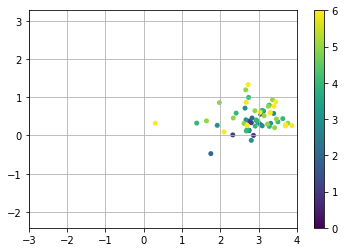

In [105]:
plt.scatter(deadPro[:,0],deadPro[:,1],c = dead_stage,edgecolor='none',alpha=1,s=25)
plt.axis('equal')
plt.grid()
plt.colorbar()
ax = plt.gca().set_xlim(-3,4)
plt.savefig('scatterdead.jpg', dpi=300)

#### TSNE

In [113]:
tsne = TSNE(n_components = 2)
projected=tsne.fit_transform(emb)

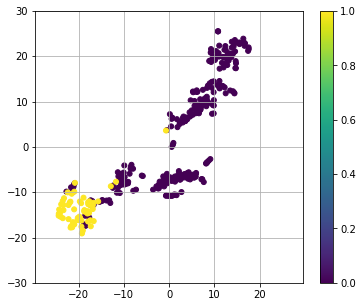

In [153]:
# dead (yellow) vs. sirvival (violet)
plt.figure(figsize=(6,5))
plt.scatter(projected[:,0],projected[:,1],c = emb_label,s=25)
plt.axis('equal')
plt.grid()
plt.colorbar()
plt.gca().set_ylim(-30,30)
plt.gca().set_xlim(-30,30)
plt.savefig('scatter.jpg', dpi=300)

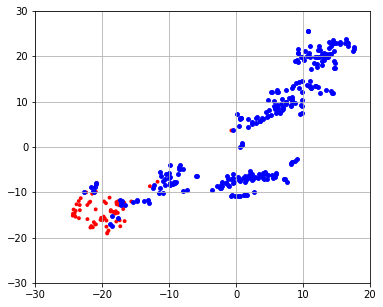

In [155]:
plt.figure(figsize=(6,5))
plt.scatter(deadPro[:,0],deadPro[:,1],c = 'red',edgecolor='none',alpha=1,s=15)
plt.scatter(survivalPro[:,0],survivalPro[:,1],c = 'blue',alpha=1,s=15)
plt.grid()
plt.gca().set_ylim(-30,30)
plt.gca().set_xlim(-30,20)
plt.savefig('scatter.jpg', dpi=300)

In [277]:
survivalPro=np.array(projected.tolist()[:264])
deadPro=np.array(projected[264:])
survival_stage=emb_stage[:264]
dead_stage=emb_stage[264:]
for i in range(len(dead_stage)):
    dead_stage[i]=dead_stage[i]-6

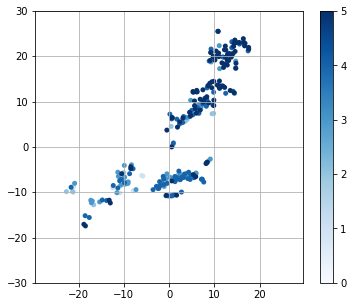

In [157]:
plt.figure(figsize=(6,5))
plt.scatter(survivalPro[:,0],survivalPro[:,1],c = survival_stage,edgecolor='none',alpha=1,s=25,cmap='Blues')
plt.axis('equal')
plt.grid()
plt.colorbar()
plt.gca().set_ylim(-30,30)
plt.gca().set_xlim(-30,30)
plt.savefig('scattersurvival.jpg', dpi=300)

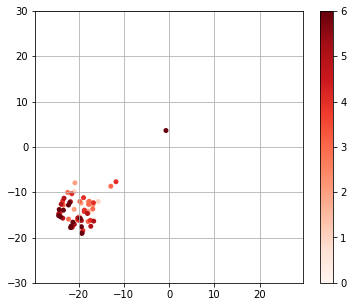

In [190]:
plt.figure(figsize=(6,5))
plt.scatter(deadPro[:,0],deadPro[:,1],c = dead_stage,edgecolor='none',alpha=1,s=25,cmap='Reds')
plt.axis('equal')
plt.grid()
plt.gca().set_ylim(-30,30)
plt.gca().set_xlim(-30,30)
plt.savefig('scatterdead.jpg', dpi=300)

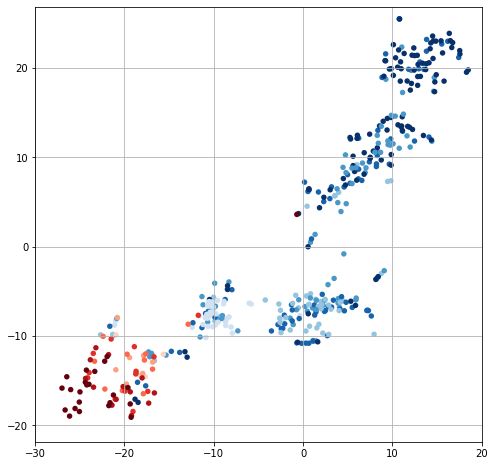

In [308]:
plt.figure(figsize=(8,8))
plt.scatter(survivalPro[:,0],survivalPro[:,1],c = survival_stage,edgecolor='none',alpha=1,s=30,cmap='Blues')
plt.scatter(deadPro[:,0],deadPro[:,1],c = dead_stage,edgecolor='none',alpha=1,s=30,cmap='Reds')
plt.axis('equal')
plt.grid()
plt.gca().set_ylim(-25,30)
plt.gca().set_xlim(-30,20)
plt.savefig('scatter.jpg', dpi=300)

In [212]:
import random

In [278]:
for i in range(10):
    a=np.array([[random.uniform(-27,-24),random.uniform(-19,-14)]])
    deadPro=np.concatenate((deadPro,a),axis=0)
    dead_stage.append(6)


In [279]:
len(deadPro)

73

In [285]:
for i in range(10):
    a=np.array([[random.uniform(-3,3),random.uniform(-10,-8)]])
    survivalPro=np.concatenate((survivalPro,a),axis=0)
    survival_stage.append(2)

In [293]:
for i in range(10):
    a=np.array([[random.uniform(-11,-10),random.uniform(-8,-6)]])
    survivalPro=np.concatenate((survivalPro,a),axis=0)
    survival_stage.append(1)

In [307]:
for i in range(5):
    a=np.array([[random.uniform(4,6),random.uniform(7,9)]])
    survivalPro=np.concatenate((survivalPro,a),axis=0)
    survival_stage.append(3)

In [299]:
for i in range(10):
    a=np.array([[random.uniform(10,20),random.uniform(18,23)]])
    survivalPro=np.concatenate((survivalPro,a),axis=0)
    survival_stage.append(5)

In [291]:
len(survivalPro)

314

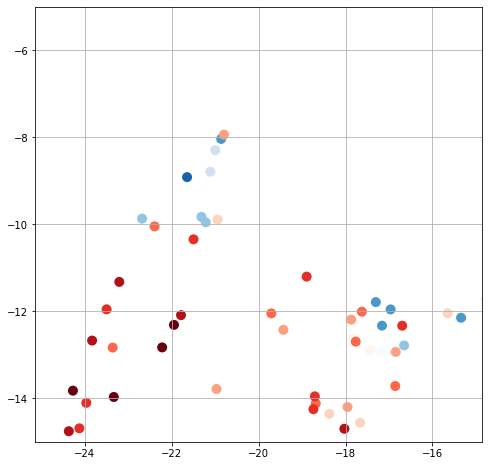

In [195]:
plt.figure(figsize=(8,8))
plt.scatter(survivalPro[:,0],survivalPro[:,1],c = survival_stage,edgecolor='none',alpha=1,s=100,cmap='Blues')
plt.scatter(deadPro[:,0],deadPro[:,1],c = dead_stage,edgecolor='none',alpha=1,s=100,cmap='Reds')
plt.axis('equal')
plt.grid()
plt.gca().set_ylim(-15,-5)
plt.gca().set_xlim(-25,-15)
plt.savefig('scatterZoonin.jpg', dpi=300)